In [8]:
from tifffile import imread
import tifffile
import numpy as np
import os
import pandas as pd

In [9]:

input_dir = r"F:\2022_08_30_15_01_33--ASTHMA_r4_corrected001/"
input_dir = input_dir.replace("\\", "/")
input_dir = input_dir.replace("\\", "/")
output_dir = 'F:/Processing/'
files = os.listdir(input_dir)
bases = [4]

In [10]:
tifs =  [k for k in files if 'dw' not in k] # filter for deconvolved images
tifs =  [k for k in tifs if '.tif' in k]
tifs =  [k for k in tifs if '.txt' not in k]

In [11]:
tifs

['Region 1 Corrected--Stage00--Z00--C00.tif',
 'Region 1 Corrected--Stage00--Z00--C01.tif',
 'Region 1 Corrected--Stage00--Z00--C02.tif',
 'Region 1 Corrected--Stage00--Z00--C03.tif',
 'Region 1 Corrected--Stage00--Z00--C04.tif',
 'Region 1 Corrected--Stage00--Z01--C00.tif',
 'Region 1 Corrected--Stage00--Z01--C01.tif',
 'Region 1 Corrected--Stage00--Z01--C02.tif',
 'Region 1 Corrected--Stage00--Z01--C03.tif',
 'Region 1 Corrected--Stage00--Z01--C04.tif',
 'Region 1 Corrected--Stage00--Z02--C00.tif',
 'Region 1 Corrected--Stage00--Z02--C01.tif',
 'Region 1 Corrected--Stage00--Z02--C02.tif',
 'Region 1 Corrected--Stage00--Z02--C03.tif',
 'Region 1 Corrected--Stage00--Z02--C04.tif',
 'Region 1 Corrected--Stage00--Z03--C00.tif',
 'Region 1 Corrected--Stage00--Z03--C01.tif',
 'Region 1 Corrected--Stage00--Z03--C02.tif',
 'Region 1 Corrected--Stage00--Z03--C03.tif',
 'Region 1 Corrected--Stage00--Z03--C04.tif',
 'Region 1 Corrected--Stage00--Z04--C00.tif',
 'Region 1 Corrected--Stage00--Z04

In [12]:
tifs =  [k for k in tifs if 'Corrected' in k]
split_underscore = pd.DataFrame(tifs)[0].str.split('--', expand = True)


In [15]:
maxi

array([[113., 113., 115., ..., 115., 117., 113.],
       [113., 110., 112., ..., 113., 118., 114.],
       [110., 114., 108., ..., 110., 113., 113.],
       ...,
       [112., 109., 110., ..., 116., 123., 125.],
       [115., 115., 116., ..., 117., 121., 125.],
       [112., 118., 113., ..., 117., 119., 126.]])

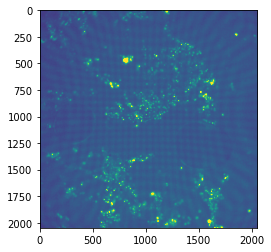

In [24]:
import matplotlib.pyplot as plt
plt.imshow(maxi*40,vmax=6000)

In [25]:
im_array > maxi

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [16]:
for asi in split_underscore[0].unique():
    tiles = sorted(split_underscore[1].unique())
    channels = split_underscore[3].unique()
    folder_output = output_dir +asi+ '/preprocessing/2DTiles/'
    if not os.path.exists(folder_output):
        os.makedirs(folder_output)
    filter=split_underscore[0]==asi
    filtered_tifs = [i for indx,i in enumerate(tifs) if filter[indx] == True]
    tiles = sorted(split_underscore.loc[filter,1].unique())
    channels = split_underscore.loc[filter,3].unique()
    for ååå, w in enumerate(sorted(bases)):
        for f,i in enumerate(tiles):
            print(i)
            tifs_base_tile = [k for k in filtered_tifs if str(i)+'--' in k]
            file_name = (folder_output+'Base_'+ str(int(w)) + '_t' + str(int(i.split('Stage')[1])+1) + '.tif')
            if os.path.isfile(file_name)==True and os.path.getsize(file_name)>40000000:
                print('already exists')
            else:
              #  with tifffile.TiffWriter(file_name) as stack:
                    for å,z in enumerate(sorted(list(channels))):
                        print(z)
                        tifs_base_tile_channel = [k for k in tifs_base_tile if str(z) in k]
                        maxi = np.zeros((2048,2048))
                        for q in (tifs_base_tile_channel):
                            print(q)
                            im_array = imread(input_dir + q)
                            inds = im_array > maxi # find where image intensity > max intensity
                            maxi[inds] = im_array[inds]
                        maxi = maxi.astype('uint16')
                        stack.save(maxi)

Stage00
C00.tif
Region 1 Corrected--Stage00--Z00--C00.tif
Region 1 Corrected--Stage00--Z01--C00.tif
Region 1 Corrected--Stage00--Z02--C00.tif
Region 1 Corrected--Stage00--Z03--C00.tif
Region 1 Corrected--Stage00--Z04--C00.tif
Region 1 Corrected--Stage00--Z05--C00.tif
Region 1 Corrected--Stage00--Z06--C00.tif
Region 1 Corrected--Stage00--Z07--C00.tif
Region 1 Corrected--Stage00--Z08--C00.tif
Region 1 Corrected--Stage00--Z09--C00.tif
Region 1 Corrected--Stage00--Z10--C00.tif
Region 1 Corrected--Stage00--Z11--C00.tif
Region 1 Corrected--Stage00--Z12--C00.tif
Region 1 Corrected--Stage00--Z13--C00.tif
Region 1 Corrected--Stage00--Z14--C00.tif
Region 1 Corrected--Stage00--Z15--C00.tif
Region 1 Corrected--Stage00--Z16--C00.tif
Region 1 Corrected--Stage00--Z17--C00.tif
Region 1 Corrected--Stage00--Z18--C00.tif
Region 1 Corrected--Stage00--Z19--C00.tif
Region 1 Corrected--Stage00--Z20--C00.tif
Region 1 Corrected--Stage00--Z21--C00.tif
Region 1 Corrected--Stage00--Z22--C00.tif
Region 1 Corrected

KeyboardInterrupt: 

Stage00
Stage01
Stage02
Stage03
Stage04
Stage05
Stage06
Stage07
Stage08
Stage09
Stage10
Stage11
Stage12
Stage13
Stage14
Stage15
Stage16
Stage17
Stage18
Stage19
Stage20
Stage21
Stage22
Stage23
Stage24
Stage25
Stage26
Stage27
Stage28
Stage29
Stage30
Stage31
Stage32
Stage33
Stage34
Stage35
Stage36
Stage37
Stage38
Stage39
Stage40
Stage41
Stage42
Stage43
Stage44
Stage45
Stage46
Stage47
Stage48
Stage49
Stage50
Stage51
Stage52
Stage53
Stage54
Stage55
Stage56
Stage57
Stage58
Stage59
Stage60
Stage61
Stage62
Stage63
Stage64
Stage65
Stage66
Stage67
Stage68
Stage69
Stage70
Stage71
Stage72
Stage73
Stage74
Stage75
Stage76
Stage77
Stage78
Stage79
Stage80
Stage81
Stage82
Stage83
Stage84
Stage85
Stage86
Stage87
Stage88
Stage89
Stage90
Stage91
Stage92
Stage93


In [12]:
input_dir_int = input_dir +  '/metadata/' 
output_dir_int = output_dir + '/preprocessing/2DTiles/'
path = input_dir_int
metadatafiles = [n for n in os.listdir(path) if os.path.isfile(os.path.join(path,n))]
onlyxml =  [k for k in metadatafiles if '.xml' in k]
metadatafiles_cleaned = sorted([o for o in onlyxml if 'Properties.xml' in o])

for p, meta in enumerate(metadatafiles_cleaned):
    for base in range(number_of_bases):
        metadata_txt = open(output_dir_int +"TileConfiguration_Base_" + str(base+1) + ".txt","a") 
        metadata_txt.write('# Define the number of dimensions we are working on\n')
        metadata_txt.write('dim = 2\n\n# Define the image coordinates\n')
        mydoc = minidom.parse(path + meta)
        tile =[]
        x =[]
        y =[]
        items = mydoc.getElementsByTagName('Tile')
        for elem in items:

            tile.append(int(elem.attributes['FieldX'].value))
            x.append(float(elem.attributes['PosX'].value))
            y.append(float(elem.attributes['PosY'].value))


        dict = {'x': x, 'y': y}     
        df = pd.DataFrame(dict) 
        df['x'] =((df.x-np.min(df.x))/.000000321) + 1
        df['y'] =((df.y-np.min(df.y))/.000000321) + 1

        for elem in items:
            tile_value = elem.attributes['FieldX'].value
            x_value = ((float(elem.attributes['PosX'].value))-np.min(x))/.000000321 + 1
            y_value = ((float(elem.attributes['PosY'].value))-np.min(y))/.000000321 + 1
        metadata_txt.write('Base_' + str(base+1) + '_t' + tile_value +'; ; ' + '(' + str(x_value)+ ', ' + str(y_value) + ')' + '\n')
        df.to_csv(output_dir_int + 'tile_coordinates_Base_'+str(base+1)+'.csv', index = False, header = None)


In [13]:
df

NameError: name 'df' is not defined